In [1]:
import numpy as np
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5,NaN,S


In [5]:
df=pd.read_csv("train.csv",usecols=['Age','Fare','Survived'])

In [6]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [7]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_41692/694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

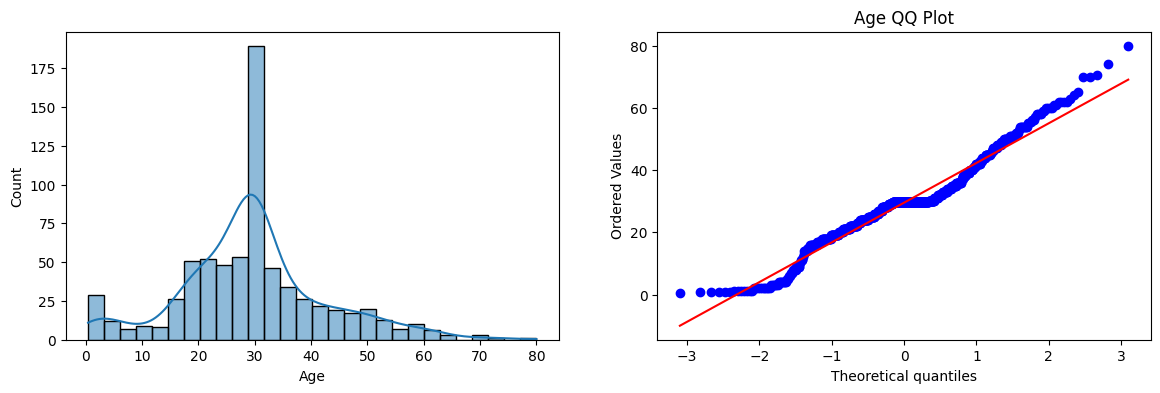

In [14]:
# sns.distplot doest'n obey the subplots it is better to used histplot.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Age'],kde=True)

plt.subplot(1,2,2)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

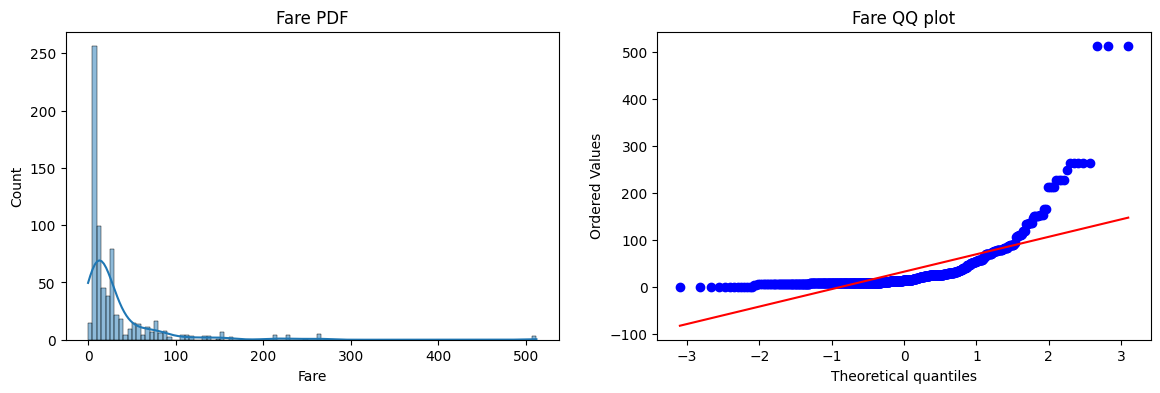

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(x_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ plot')
plt.show()
# This plot is clearly show that this is right skew.
# Since This is right skew so it is better to used log tranformations.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [17]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

DecisionTreeClassifier()

In [18]:
y_pre1=clf1.predict(x_test)
y_pre2=clf2.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
print("Accuracy LR ",accuracy_score(y_test,y_pre1))
print("Accuracy DT ",accuracy_score(y_test,y_pre2))

Accuracy LR  0.6480446927374302
Accuracy DT  0.6536312849162011


In [20]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)

In [21]:
x_train_transform=trf.fit_transform(x_train)
x_test_transform=trf.fit_transform(x_test)

In [22]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [23]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [24]:
clf1.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

DecisionTreeClassifier()

In [25]:
y_pre1=clf1.predict(x_test_transform)
y_pre2=clf2.predict(x_test_transform)

In [26]:
print("Accuracy LR ",accuracy_score(y_test,y_pre1))
print("Accuracy DT",accuracy_score(y_test,y_pre2))

Accuracy LR  0.6815642458100558
Accuracy DT 0.6871508379888268


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
x_transform=trf.fit_transform(x)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,x_transform,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transform,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588639200998752


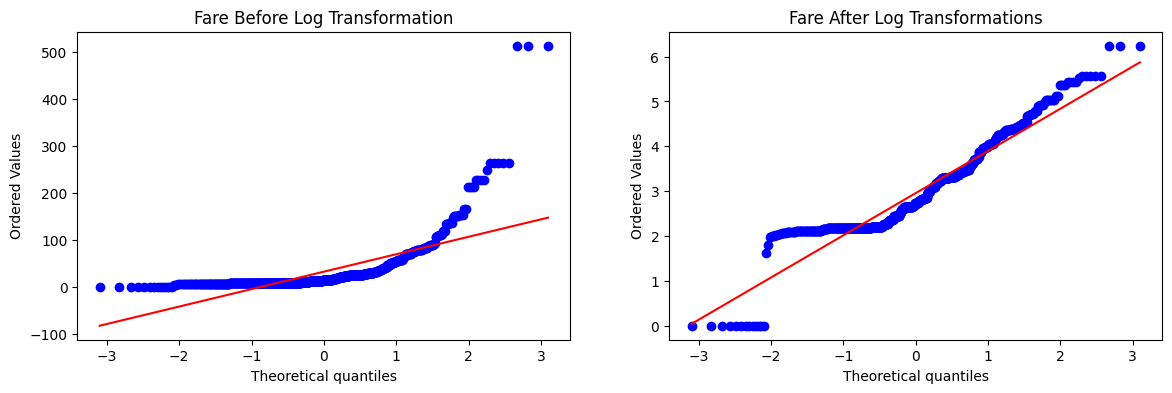

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(1,2,2)
stats.probplot(x_train_transform['Fare'],dist='norm',plot=plt)
plt.title('Fare After Log Transformations')
plt.show()
# Now Fare is close to the normal distribution. Which improved the accuracy.

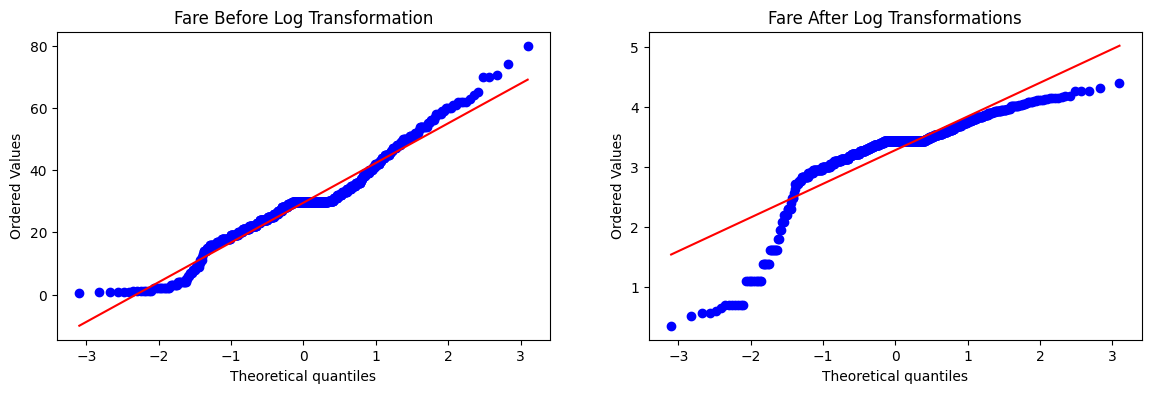

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(1,2,2)
stats.probplot(x_train_transform['Age'],dist='norm',plot=plt)
plt.title('Fare After Log Transformations')
plt.show()
# From this figure it is clearly show that in Age columns Transformatios is not required. Beacuse afte appling the transformatinons 
# it decreased the accuracy of the models . And it is not Normal distrubutions.

In [31]:
# So it's better to used the log transformation in Fare not the Age.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

x_train_transform2=trf2.fit_transform(x_train)
x_test_transform2=trf2.fit_transform(x_test)

In [32]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(x_train_transform2,y_train)
clf2.fit(x_train_transform2,y_train)

y_pred1=clf1.predict(x_test_transform2)
y_pred2=clf2.predict(x_test_transform2)

In [33]:
print("Accuracy LR ",accuracy_score(y_test,y_pred1))
print("Accuracy DT ",accuracy_score(y_test,y_pred2))

Accuracy LR  0.6703910614525139
Accuracy DT  0.6703910614525139


In [34]:
# This is cross_val_score.

x_transform2=trf2.fit_transform(x)

clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,x_transform,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transform,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.657752808988764


In [35]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.61729088639201


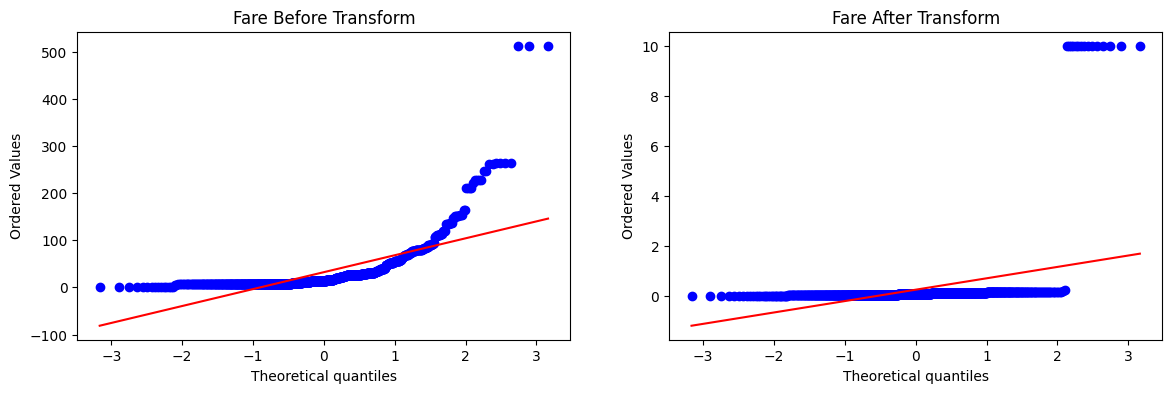

In [36]:
apply_transform(lambda x : 1/(x+0.1))